# **Metodología EDA para CDP**


# Descripción de las Columnas - Diccionario de Datos

* **id_persona**: Identificador único de la persona.
* **nombre**: Nombre de pila de la persona.
* **apellido**: Apellido de la persona.
* **edad**: Edad de la persona en años.
* **genero**: Género declarado de la persona (Femenino o Masculino)
* **ciudad_residencia**: Ciudad donde reside  actualmente la persona (elegida entre 10 ciudades principales de EE. UU.)
* **estrato_socioeconomico**: Nivel socioeconómico aproximado (Bajo, Medio, Alto, Muy Alto).
* **frecuencia_visita**: Número aproximado de visitas al mes a restaurantes.
* **promedio_gasto_comida**: Gasto promedio por visita a restaurantes (USD).
* **ocio**: Indica si la persona suele participar en actividades de ocio (Sí / No).
* consume_licor: Indica si la persona suele consumir licor (Sí / No) al visitar un restaurante.
* **preferencias_alimenticias**: Preferencia de dieta (Vegano, Vegetariano, Pesacado, Mariscos, etc.).
* **membresia_premium**: Indica si la persona tiene membresía premium (Sí / No) en algún restaurante.
* **telefono_contacto**: Número de teléfono (campo innecesario para el análisis, sirve para practicar limpieza).
* **correo_electronico**: Correo electrónico de la persona.
* **tipo_de_pago_mas_usado**: Método de pago más frecuente (Efectivo, Tarjeta, App, Cripto).
* **ingresos_mensuales**: Ingresos mensuales estimados (USD).

# Librerias

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [6]:
# Carga de datos


csv_path = os.path.join('..', 'base_datos_restaurantes_USA (1).csv')

if not os.path.exists(csv_path):
    
    raise FileNotFoundError(f"El archivo {csv_path} no existe.")


df = pd.read_csv(csv_path)

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

In [9]:
df.sample(20)

,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
25116,4742949477,Chelsea,Richards,55.0,Femenino,NYC,Bajo,2,15.19,Sí,Sí,Carnes,No,NaN,wilkinsonstephanie@example.com,Tarjeta,1012
18837,9977713986,Matthew,Holt,78.0,Masculino,Houston,Muy Alto,6,90.95,Sí,No,NaN,Sí,NaN,NaN,Efectivo,15669
22871,3081141025,Kimberly,Cook,72.0,Femenino,Dallas,Medio,2,12.61,No,No,Otro,No,752.364.3528x2303,angela08@example.org,Efectivo,2754
29620,3206955437,Erin,Patterson,35.0,Femenino,Chicago,Bajo,1,9.10,Sí,No,Vegetariano,No,NaN,peterscassandra@example.net,App,894
5897,5153500765,Sarah,Mckinney,47.0,Femenino,San Diego,Medio,5,34.30,Sí,Sí,Vegano,No,NaN,harrellamanda@example.com,Tarjeta,2436
28706,5150074940,Nicole,Wright,66.0,Femenino,San Diego,Bajo,3,18.92,Sí,No,Carnes,No,NaN,psparks@example.net,App,1013
23204,2958709519,Michael,Rowe,24.0,Masculino,Seattle,Bajo,0,0.00,Sí,Sí,Mariscos,No,NaN,NaN,App,1128
11408,3759627967,Kristy,White,55.0,Femenino,Miami,Alto,-3,43.39,No,No,Otro,Sí,NaN,NaN,App,8319
9089,6407956109,Samantha,Burke,71.0,Femenino,Chicago,Alto,6,47.43,No,No,Pescado,Sí,206.639.1237x1659,NaN,Efectivo,6161
18939,5332533199,Anthony,Holland,75.0,Masculino,Miami,Medio,4,17.76,Sí,Sí,Pescado,No,NaN,stevensonkaren@example.net,Efectivo,2446


In [10]:
# Tamaño del dataset

df.shape

(30000, 17)

# Columnas Innecesarias

In [11]:
# Lista de Columnas Innecesarias

columnas_inncesarias = [
    'id_persona',
    'nombre',
    'apellido',
    'telefono_contacto',
    'correo_electronico'
]

# Eliminar columnas inncesarias

df.drop(columns = columnas_inncesarias, inplace = True)

In [12]:
df.columns

Index(['edad', 'genero', 'ciudad_residencia', 'estrato_socioeconomico',
       'frecuencia_visita', 'promedio_gasto_comida', 'ocio', 'consume_licor',
       'preferencias_alimenticias', 'membresia_premium',
       'tipo_de_pago_mas_usado', 'ingresos_mensuales'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       29899 non-null  float64
 1   genero                     30000 non-null  object 
 2   ciudad_residencia          30000 non-null  object 
 3   estrato_socioeconomico     30000 non-null  object 
 4   frecuencia_visita          30000 non-null  int64  
 5   promedio_gasto_comida      29855 non-null  float64
 6   ocio                       30000 non-null  object 
 7   consume_licor              30000 non-null  object 
 8   preferencias_alimenticias  28597 non-null  object 
 9   membresia_premium          30000 non-null  object 
 10  tipo_de_pago_mas_usado     30000 non-null  object 
 11  ingresos_mensuales         30000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 2.7+ MB


# Revisión de Nulos

In [14]:
# Conteo de Datos Nulos

df.isnull().sum().sort_values(ascending = False)

preferencias_alimenticias    1403
promedio_gasto_comida         145
edad                          101
genero                          0
estrato_socioeconomico          0
ciudad_residencia               0
ocio                            0
frecuencia_visita               0
consume_licor                   0
membresia_premium               0
tipo_de_pago_mas_usado          0
ingresos_mensuales              0
dtype: int64

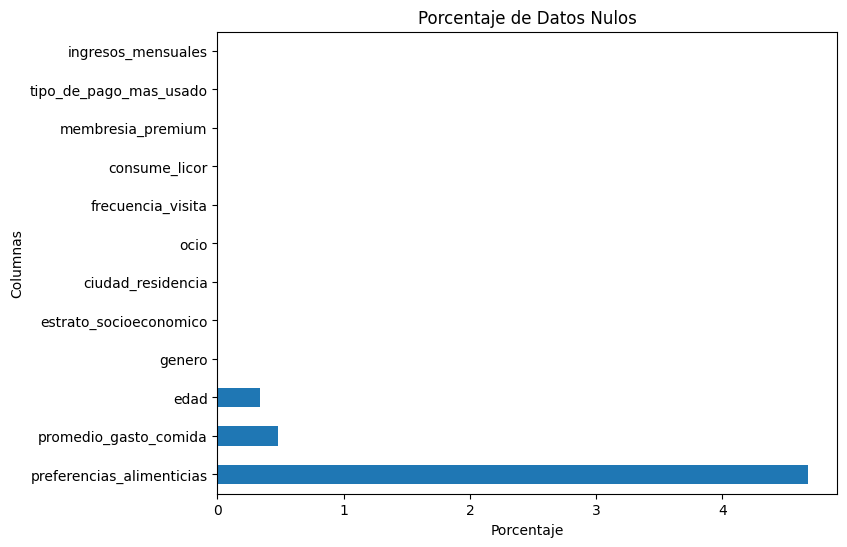

In [15]:
# Graficación de percentaje de nulos

(df.isnull().mean() * 100).sort_values(ascending = False).plot(kind = 'barh', figsize = (8, 6))
plt.title('Porcentaje de Datos Nulos')
plt.xlabel('Porcentaje')
plt.ylabel('Columnas')
plt.show()

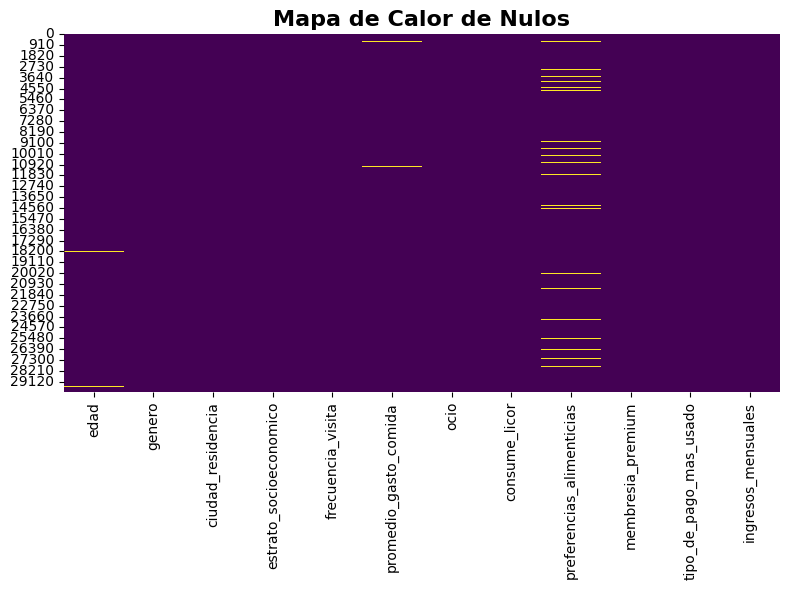

In [16]:
# Heatmap de nulos

plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')
plt.title('Mapa de Calor de Nulos', fontsize = 16, fontweight = 'bold')
plt.tight_layout()

plt.show()

# Estadísticas Generales

In [17]:
# Estadísticas

df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
edad,29899.0,NaN,NaN,NaN,49.665006,23.83955,-5.0,33.0,49.0,65.0,300.0
genero,30000,2,Femenino,15044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ciudad_residencia,30000,10,Chicago,5384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estrato_socioeconomico,30000,4,Medio,9325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frecuencia_visita,30000.0,NaN,NaN,NaN,3.896133,2.741532,-3.0,2.0,4.0,5.0,10.0
promedio_gasto_comida,29855.0,NaN,NaN,NaN,40.232383,28.665704,0.0,18.27,34.63,55.62,149.98
ocio,30000,2,No,15094,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consume_licor,30000,2,No,15735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preferencias_alimenticias,28597,6,Carnes,7916,NaN,NaN,NaN,NaN,NaN,NaN,NaN
membresia_premium,30000,2,No,17155,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA Univariable para variables Numéricos y Categóricos


* Numéricos: Distribuciones (sesgos, asimetrias, outliers) --> Histogramas y Boxplots

* Categóricos: Tablas de frecuencia, piecharts

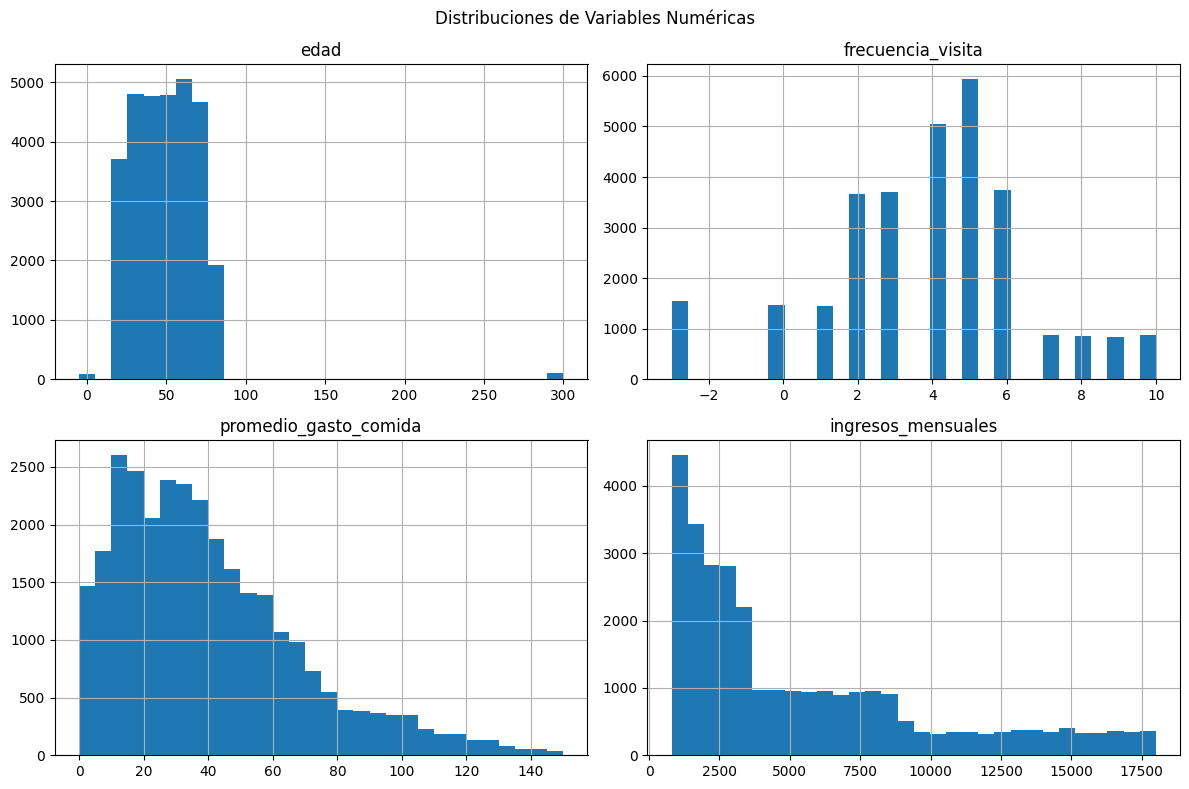

In [18]:
# Distribución de Variables Numéricas

df.select_dtypes(include = np.number).hist(bins = 30, figsize = (12, 8))
plt.suptitle('Distribuciones de Variables Numéricas')
plt.tight_layout()
plt.show()

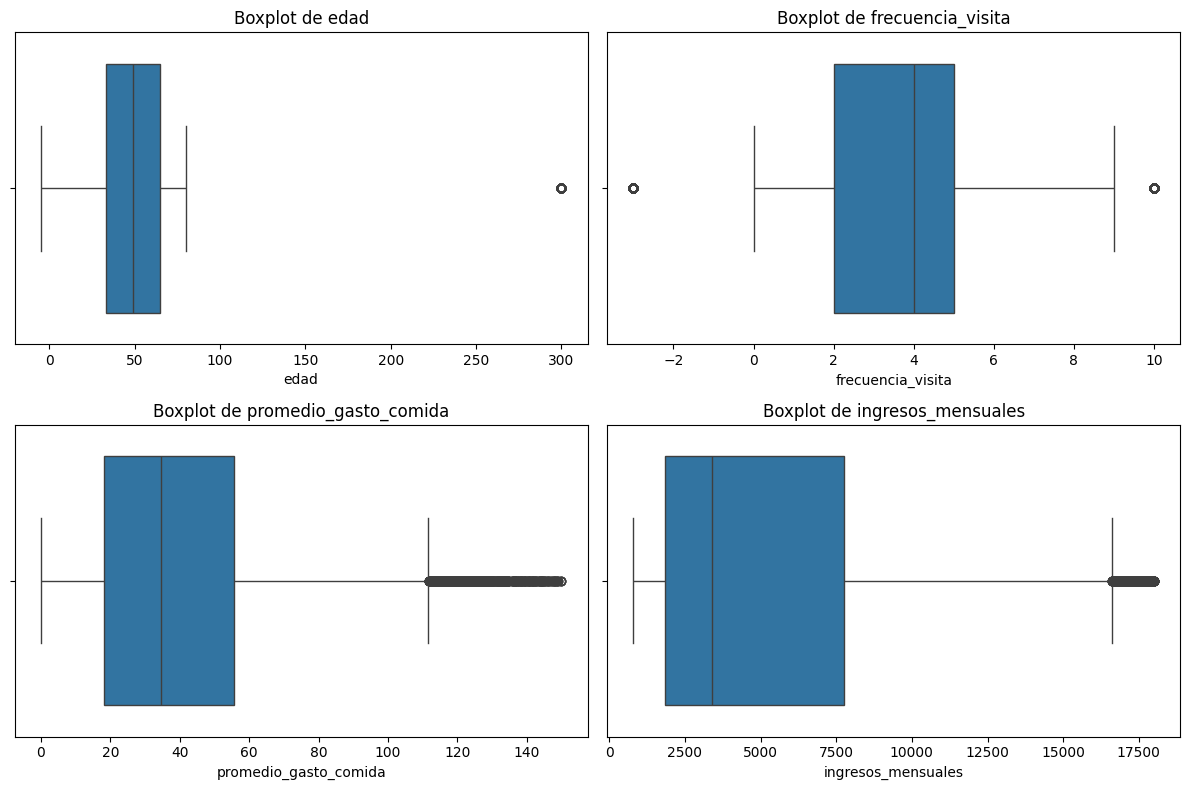

In [19]:
# Boxplots --> Detección de Outliers

columnas_numericas = df.select_dtypes(include = np.number).columns.to_list()

plt.figure(figsize = (12, 8))

for i, columna in enumerate(columnas_numericas, 1):

  plt.subplot(2, 2, i)
  sns.boxplot(x = df[columna])
  plt.title(f'Boxplot de {columna}')

plt.tight_layout()
plt.show()

In [20]:
#  Columnas Categóricas y sus valores

columnas_categoricas = df.select_dtypes(include = 'object').columns

for col in columnas_categoricas:

  print(f'Columna: {col}')
  print(df[col].value_counts(dropna = False))
  print("--" * 15)

Columna: genero
genero
Femenino     15044
Masculino    14956
Name: count, dtype: int64
------------------------------
Columna: ciudad_residencia
ciudad_residencia
Chicago      5384
NYC          4769
Miami        3186
San Diego    3075
Dallas       2602
Boston       2547
Denver       2523
Houston      2212
Seattle      2191
Phoenix      1511
Name: count, dtype: int64
------------------------------
Columna: estrato_socioeconomico
estrato_socioeconomico
Medio       9325
Alto        9038
Bajo        6161
Muy Alto    5476
Name: count, dtype: int64
------------------------------
Columna: ocio
ocio
No    15094
Sí    14906
Name: count, dtype: int64
------------------------------
Columna: consume_licor
consume_licor
No    15735
Sí    14265
Name: count, dtype: int64
------------------------------
Columna: preferencias_alimenticias
preferencias_alimenticias
Carnes         7916
Vegetariano    6580
Mariscos       5212
Vegano         3267
Pescado        2983
Otro           2639
NaN            1403
N

In [21]:
# Graficas variables categoricas

columnas_categoricas = df.select_dtypes(include = ['category']).columns

palette = sns.color_palette("dark", n_colors = len(columnas_categoricas))

sns.set(style = "whitegrid")

for i, col in enumerate(columnas_categoricas):

    plt.figure(figsize = (10, 6))
    sns.countplot(data = df, x = col, order = df[col].value_counts().index, color = palette[i % len(palette)])
    plt.xticks(rotation = 45)
    plt.title('Conteo de ' + col, fontsize = 12, fontweight = 'bold')
    plt.tight_layout()
    plt.xlabel(col)
    plt.ylabel('Conteo')

    plt.show()

# Eliminación de Outliers

In [22]:
# Variables con valores absurdos o que no corresponden con la naturaleza

df['edad'] = df['edad'].apply(lambda x: x if (x is not None and 18 <= x <= 80) else np.nan)
df['frecuencia_visita'] = df['frecuencia_visita'].apply(lambda x: x if (x is not None and 0 <= x <= 15) else np.nan)

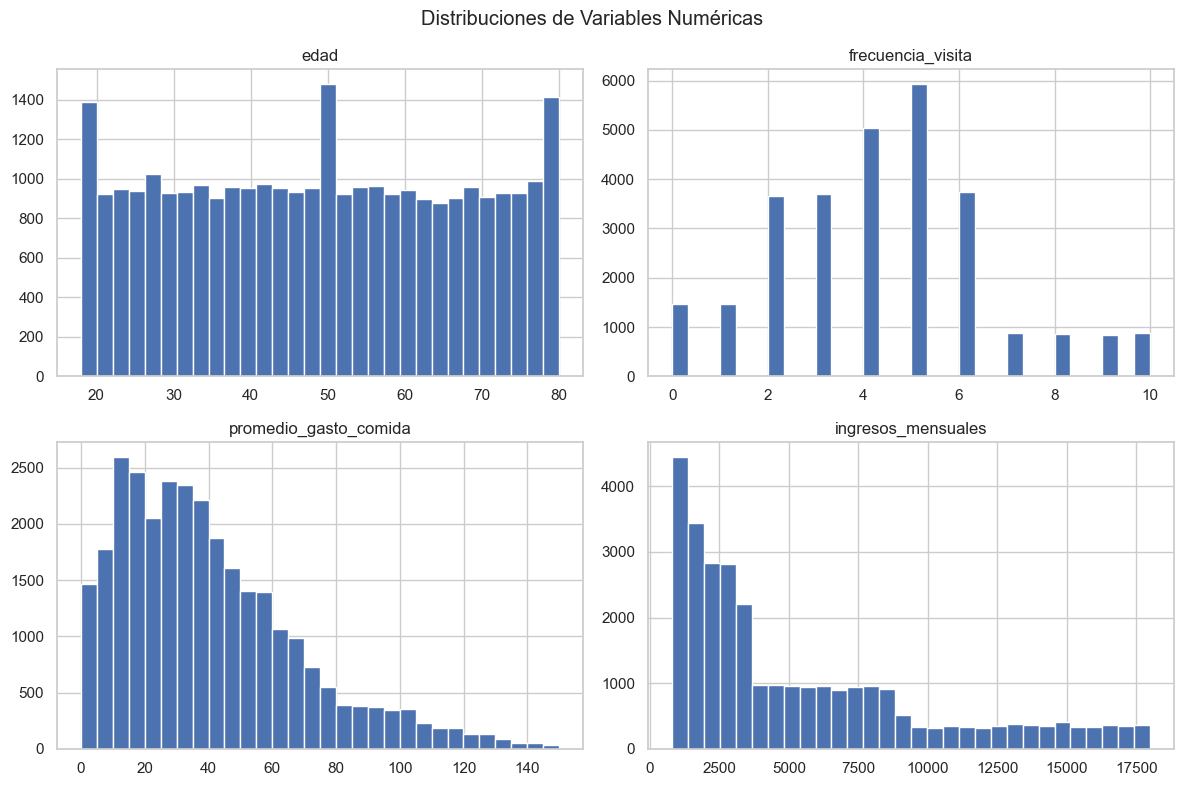

In [23]:
# Distribución de Variables Numéricas luego de eliminar atípicos

df.select_dtypes(include = np.number).hist(bins = 30, figsize = (12, 8))
plt.suptitle('Distribuciones de Variables Numéricas')
plt.tight_layout()
plt.show()

# Imputación

In [24]:
# Columnas Numéricas


columnas_numericas = df.select_dtypes(include = np.number).columns.to_list()

df_numerico = df[columnas_numericas]

# Scaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_numerico)

# Imputar con KNN

imputer = KNNImputer(n_neighbors = 5)

df_imputed_scaled = imputer.fit_transform(df_scaled)

# Aplicar al dataframe y añadirlo

df_imputado = scaler.inverse_transform(df_imputed_scaled)

df[columnas_numericas] = pd.DataFrame(df_imputado, columns = columnas_numericas)

In [25]:
# Caso Individual: Preferencias Alimentarias

df['preferencias_alimenticias'].value_counts()

preferencias_alimenticias
Carnes         7916
Vegetariano    6580
Mariscos       5212
Vegano         3267
Pescado        2983
Otro           2639
Name: count, dtype: int64

In [26]:
# Imputar por Otro los nulos

df['preferencias_alimenticias'] = df['preferencias_alimenticias'].fillna('Otro')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   edad                       30000 non-null  float64
 1   genero                     30000 non-null  object 
 2   ciudad_residencia          30000 non-null  object 
 3   estrato_socioeconomico     30000 non-null  object 
 4   frecuencia_visita          30000 non-null  float64
 5   promedio_gasto_comida      30000 non-null  float64
 6   ocio                       30000 non-null  object 
 7   consume_licor              30000 non-null  object 
 8   preferencias_alimenticias  30000 non-null  object 
 9   membresia_premium          30000 non-null  object 
 10  tipo_de_pago_mas_usado     30000 non-null  object 
 11  ingresos_mensuales         30000 non-null  float64
dtypes: float64(4), object(8)
memory usage: 2.7+ MB


In [28]:
# Cambiar el tipo de dato, de float a int

for col in columnas_numericas:

  df[col] = df[col].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   edad                       30000 non-null  int64 
 1   genero                     30000 non-null  object
 2   ciudad_residencia          30000 non-null  object
 3   estrato_socioeconomico     30000 non-null  object
 4   frecuencia_visita          30000 non-null  int64 
 5   promedio_gasto_comida      30000 non-null  int64 
 6   ocio                       30000 non-null  object
 7   consume_licor              30000 non-null  object
 8   preferencias_alimenticias  30000 non-null  object
 9   membresia_premium          30000 non-null  object
 10  tipo_de_pago_mas_usado     30000 non-null  object
 11  ingresos_mensuales         30000 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.7+ MB


# EDA Bivariado

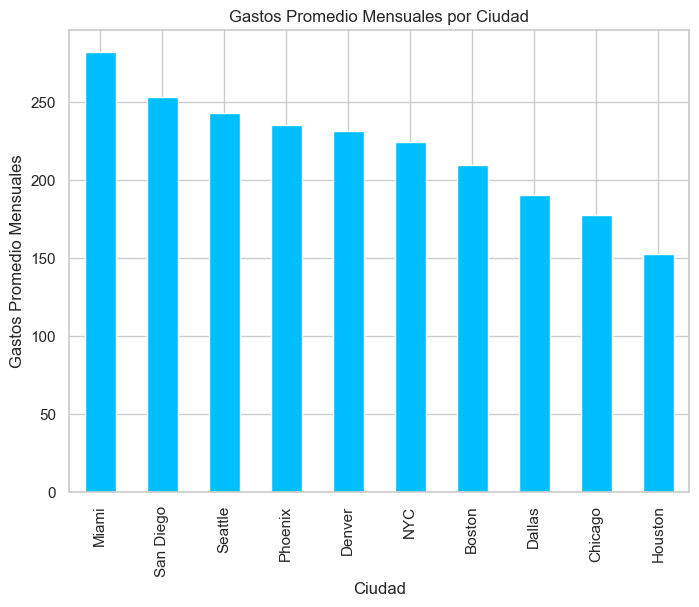

In [29]:
# Gasto Promedio por Ciudad al Mes

df["promedio_gasto_total_mes"] = df["frecuencia_visita"] * df["promedio_gasto_comida"]

ciudad_gasto = df.groupby('ciudad_residencia')['promedio_gasto_total_mes'].mean().sort_values(ascending = False)

ciudad_gasto.plot(kind = 'bar', figsize = (8, 6), color = "deepskyblue")

plt.title('Gastos Promedio Mensuales por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Gastos Promedio Mensuales')

plt.show()

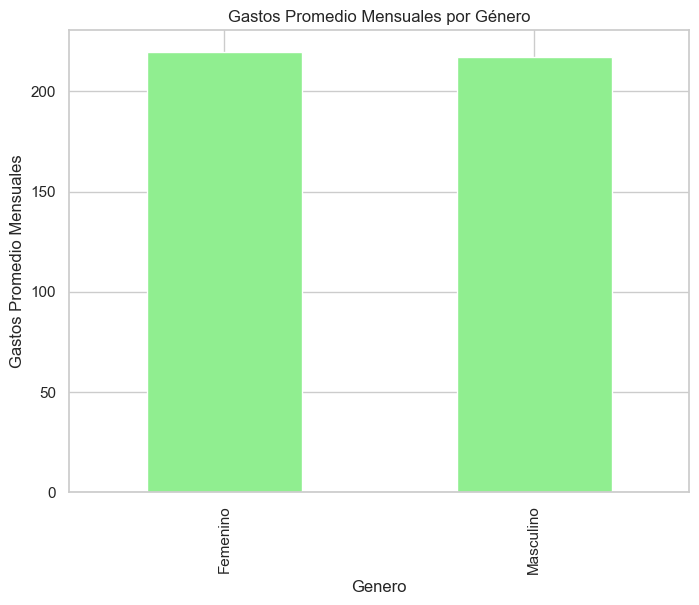

In [30]:
# Gasto Promedio de Género al Mes

genero_gasto = df.groupby('genero')['promedio_gasto_total_mes'].mean().sort_values(ascending = False)

genero_gasto.plot(kind = 'bar', color = "lightgreen", figsize = (8, 6))

plt.title('Gastos Promedio Mensuales por Género')
plt.xlabel('Genero')
plt.ylabel('Gastos Promedio Mensuales')

plt.show()

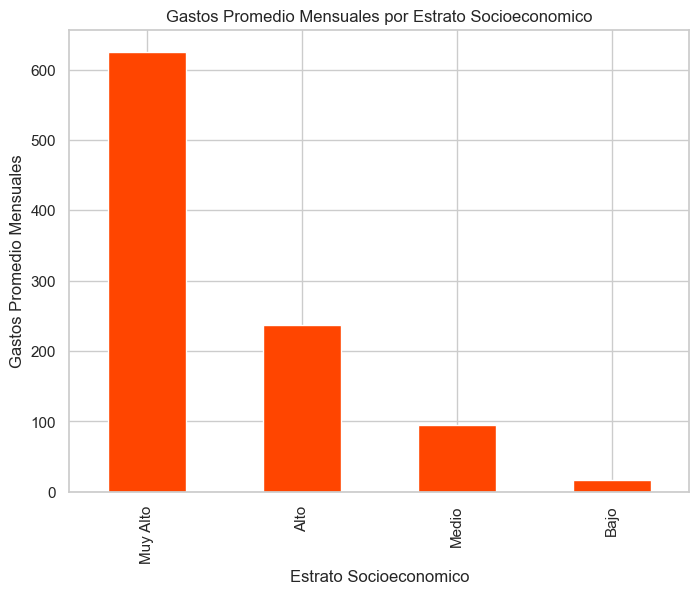

In [31]:
# Gasto Promedio por Estrato Socioeconomico al Mes

estrato_gasto = df.groupby('estrato_socioeconomico')['promedio_gasto_total_mes'].mean().sort_values(ascending = False)

estrato_gasto.plot(kind = 'bar', color = "orangered", figsize = (8, 6))

plt.title('Gastos Promedio Mensuales por Estrato Socioeconomico')
plt.xlabel('Estrato Socioeconomico')
plt.ylabel('Gastos Promedio Mensuales')

plt.show()

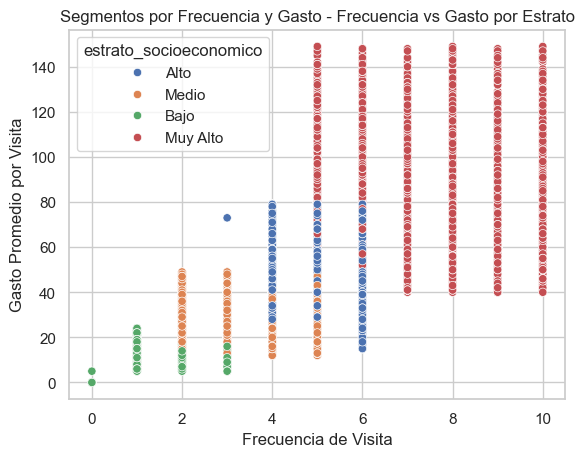

In [32]:
# Segmentos por Frecuencia y Gasto

sns.scatterplot(data = df, x = 'frecuencia_visita', y = 'promedio_gasto_comida', hue = 'estrato_socioeconomico')

plt.title('Segmentos por Frecuencia y Gasto - Frecuencia vs Gasto por Estrato')

plt.xlabel('Frecuencia de Visita')
plt.ylabel('Gasto Promedio por Visita')

plt.show()

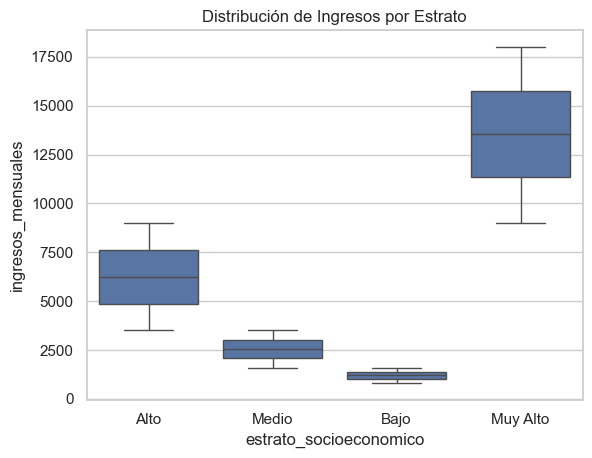

In [33]:
# Gasto vs Ingreso por Estrato

sns.boxplot(data = df, x = 'estrato_socioeconomico', y = 'ingresos_mensuales')

plt.title('Distribución de Ingresos por Estrato')

plt.show()

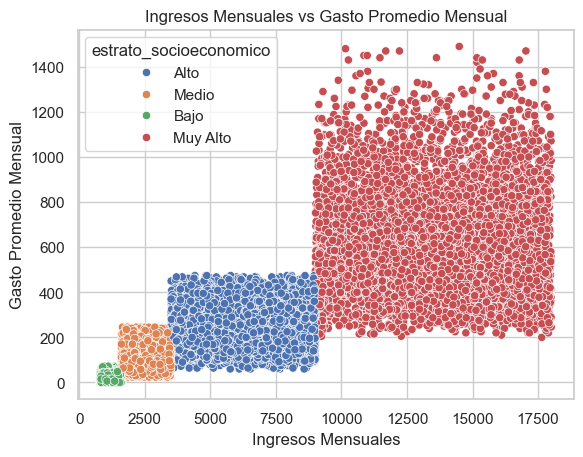

In [34]:
# Ingresos Mensuales vs Gasto Promedio Mensual

sns.scatterplot(data = df, x = 'ingresos_mensuales', y = 'promedio_gasto_total_mes', hue = 'estrato_socioeconomico')

plt.title('Ingresos Mensuales vs Gasto Promedio Mensual')

plt.xlabel('Ingresos Mensuales')
plt.ylabel('Gasto Promedio Mensual')

plt.show()

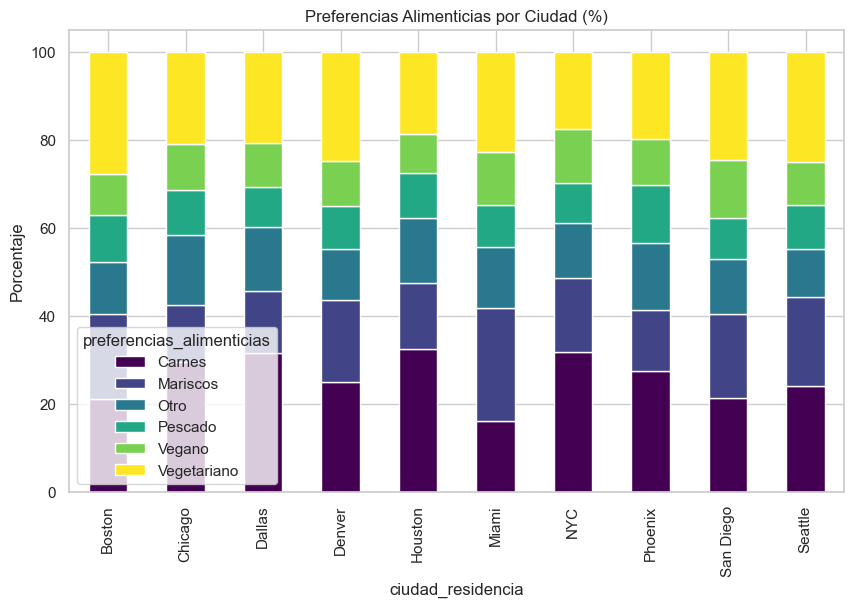

In [35]:
# Preferencias Alimenticias por Ciudad

pref_ciudad = pd.crosstab(df['ciudad_residencia'], df['preferencias_alimenticias'], normalize = 'index') * 100

pref_ciudad.plot(kind = 'bar', stacked = True, figsize = (10, 6), colormap = 'viridis')

plt.title('Preferencias Alimenticias por Ciudad (%)')
plt.ylabel('Porcentaje')

plt.show()

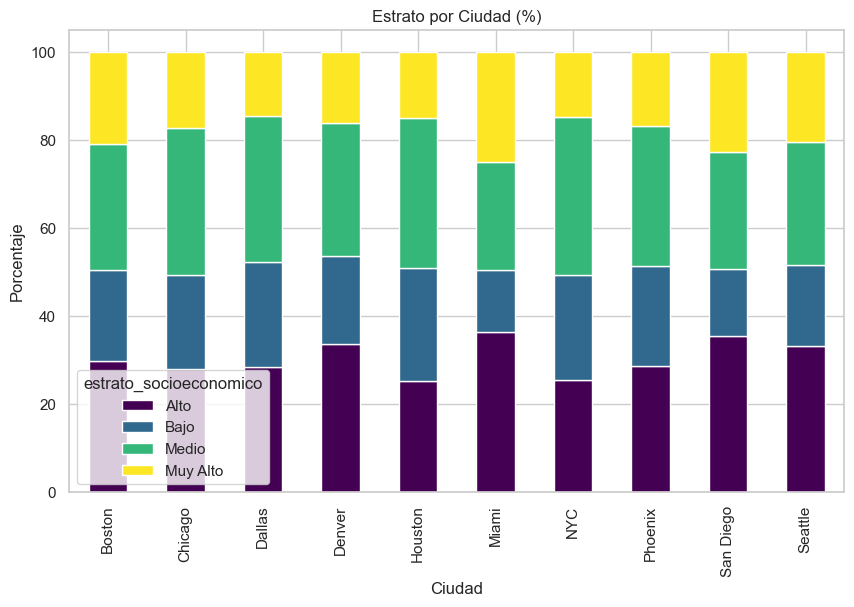

In [36]:
# Estrato por Ciudad

estrato_ciudad = pd.crosstab(df['ciudad_residencia'], df['estrato_socioeconomico'], normalize = 'index') * 100

estrato_ciudad.plot(kind = 'bar', stacked = True, figsize = (10, 6), colormap = 'viridis')

plt.title('Estrato por Ciudad (%)')
plt.xlabel('Ciudad')
plt.ylabel('Porcentaje')

plt.show()

In [37]:
# Perfil del Cliente de Gasto Alto

# Top 10% en Gasto

threshold = df['promedio_gasto_comida'].quantile(0.9)

perfil_elite = df[df['promedio_gasto_comida'] >= threshold]

perfil_elite.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
edad,3062.0,NaN,NaN,NaN,48.779229,18.229819,18.0,33.0,49.0,65.0,80.0
genero,3062,2,Femenino,1604,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ciudad_residencia,3062,10,NYC,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
estrato_socioeconomico,3062,2,Muy Alto,3026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frecuencia_visita,3062.0,NaN,NaN,NaN,7.451339,1.705943,4.0,6.0,7.0,9.0,10.0
promedio_gasto_comida,3062.0,NaN,NaN,NaN,101.35369,16.742296,79.0,88.0,98.0,112.0,149.0
ocio,3062,2,Sí,1566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consume_licor,3062,2,No,1577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
preferencias_alimenticias,3062,6,Carnes,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
membresia_premium,3062,2,Sí,2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN


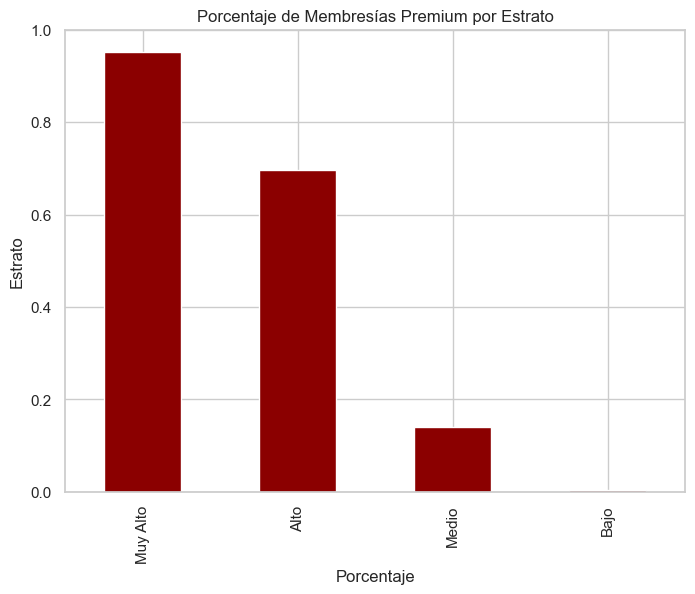

In [38]:
# Membresias por Estrato

mem_estrato = df.groupby('estrato_socioeconomico')['membresia_premium'].value_counts(normalize = True).unstack()

mem_estrato['Sí'].sort_values(ascending = False).plot(kind = 'bar', figsize = (8, 6), color = 'darkred')

plt.title('Porcentaje de Membresías Premium por Estrato')
plt.xlabel('Porcentaje')
plt.ylabel('Estrato')

plt.show()

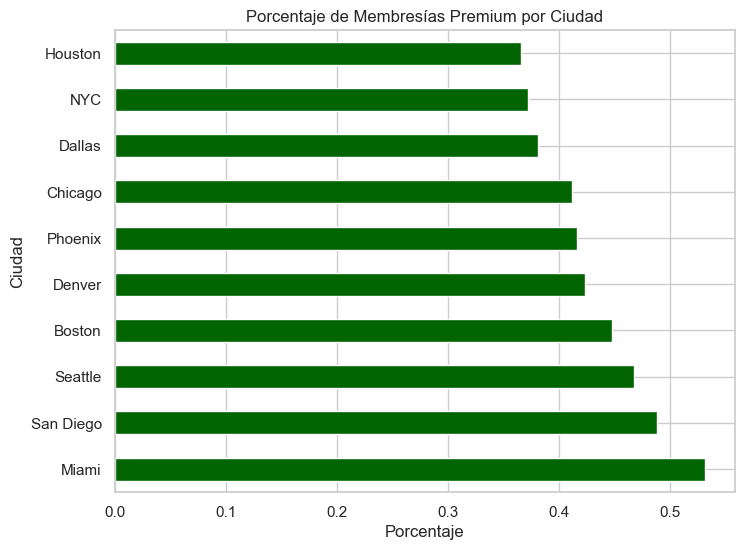

In [39]:
# Porcentaje de membresias por ciudad

mem_ciudad = df.groupby('ciudad_residencia')['membresia_premium'].value_counts(normalize = True).unstack()

mem_ciudad['Sí'].sort_values(ascending = False).plot(kind = 'barh', figsize = (8, 6), color = 'darkgreen')

plt.title('Porcentaje de Membresías Premium por Ciudad')
plt.xlabel('Porcentaje')
plt.ylabel('Ciudad')

plt.show()

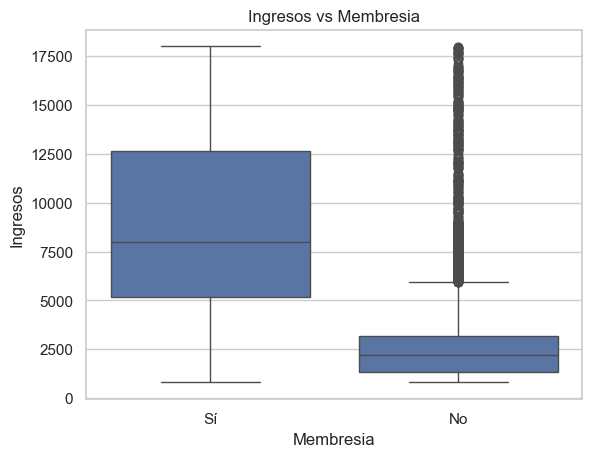

In [40]:
# Boxplot Ingresos vs Membresia

sns.boxplot(data = df, x = 'membresia_premium', y = 'ingresos_mensuales')

plt.title("Ingresos vs Membresia")
plt.xlabel("Membresia")
plt.ylabel("Ingresos")

plt.show()

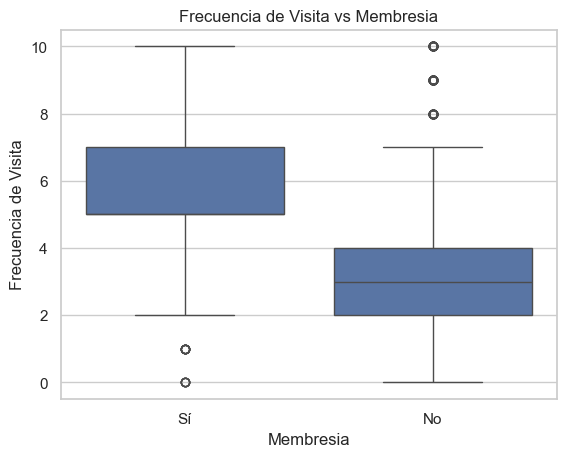

In [41]:
# Frecuencia de Visita de acuerdo con la Membresia

sns.boxplot(data = df, x = 'membresia_premium', y = 'frecuencia_visita')

plt.title("Frecuencia de Visita vs Membresia")
plt.xlabel("Membresia")
plt.ylabel("Frecuencia de Visita")

plt.show()

In [42]:
# Preferencias Alimenticias

pd.crosstab(df['preferencias_alimenticias'], df['membresia_premium'], normalize = 'index') * 100

membresia_premium,No,Sí
preferencias_alimenticias,,
Carnes,59.183931,40.816069
Mariscos,55.890253,44.109747
Otro,57.644730,42.355270
Pescado,57.626550,42.373450
Vegano,57.055403,42.944597
Vegetariano,55.379939,44.620061


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_41196\351365115.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alcohol_por_edad = df.groupby('grupo_social')['consume_licor'].value_counts(normalize = True).unstack()


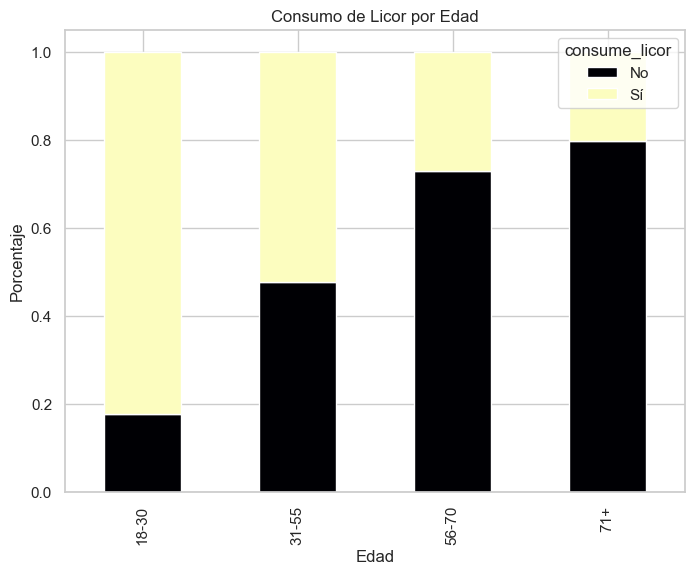

In [43]:
# Consumo de Licor por Edades

df['grupo_social'] = pd.cut(df['edad'], bins = [17, 30, 55, 70, 100], labels = ['18-30', '31-55', '56-70', '71+'])

alcohol_por_edad = df.groupby('grupo_social')['consume_licor'].value_counts(normalize = True).unstack()

alcohol_por_edad.plot(kind = 'bar', stacked = True, figsize = (8, 6), colormap = 'magma')

plt.title('Consumo de Licor por Edad')
plt.xlabel('Edad')
plt.ylabel('Porcentaje')

plt.show()

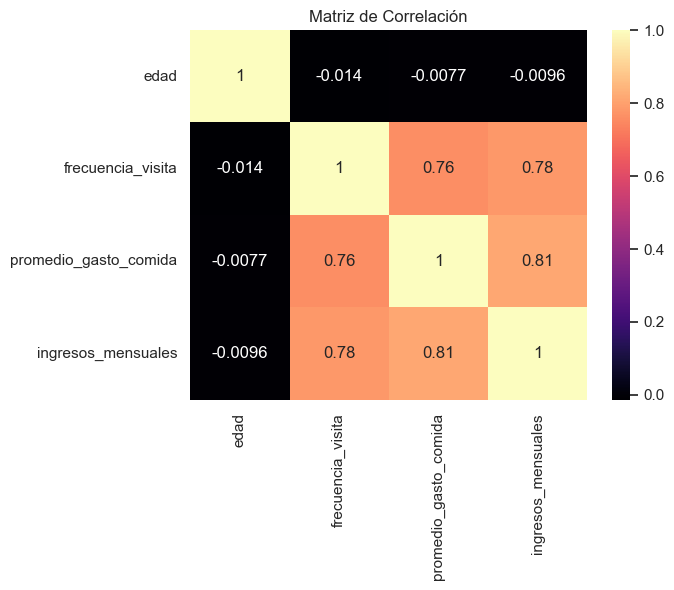

In [44]:
# Matriz de Correlación

sns.heatmap(df[columnas_numericas].corr(), annot = True, cmap = 'magma')

plt.title('Matriz de Correlación')

plt.show()